In [ ]:
# Instalacja kaggle
!pip install kaggle

!pip install folium
# Tworzenie folderu na klucz API
!mkdir -p ~/.kaggle
# Widget do mapy
!pip install ipywidgets
# Pobieranie datasetu bezpośrednio z URL (to jest alternatywna metoda, która nie wymaga klucza Kaggle)
!wget https://raw.githubusercontent.com/rgriff23/Olympic_history/master/data/athlete_events.csv
!wget -nc https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
--2025-01-16 14:27:57--  https://raw.githubusercontent.com/rgriff23/Olympic_history/master/data/athlete_events.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41229571 (39M) [text/plain]
Saving to: ‘athlete_events.csv’

athlete_events.csv  100%[===================>]  39.32M   202MB/s    in 0.2s    

2025-01-16 14:27:58 (202 MB/s) - ‘athlete_events.csv’ saved [41229571/41229571]

--2025-01-16 14:27:58--  https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

-rw-r--r-- 1 root root 41229571 Jan 14 19:01 athlete_events.csv

Top 15 krajów pod względem liczby medali:
Medal  Bronze  Gold  Silver  Total
NOC                               
USA      1358  2638    1641   5637
URS       689  1082     732   2503
GER       746   745     674   2165
GBR       651   678     739   2068
FRA       666   501     610   1777
ITA       531   575     531   1637
SWE       535   479     522   1536
CAN       451   463     438   1352
AUS       517   348     455   1320
RUS       408   390     367   1165
HUN       371   432     332   1135
NED       413   287     340   1040
NOR       294   378     361   1033
GDR       281   397     327   1005
CHN       292   350     347    989


<Figure size 1500x800 with 0 Axes>

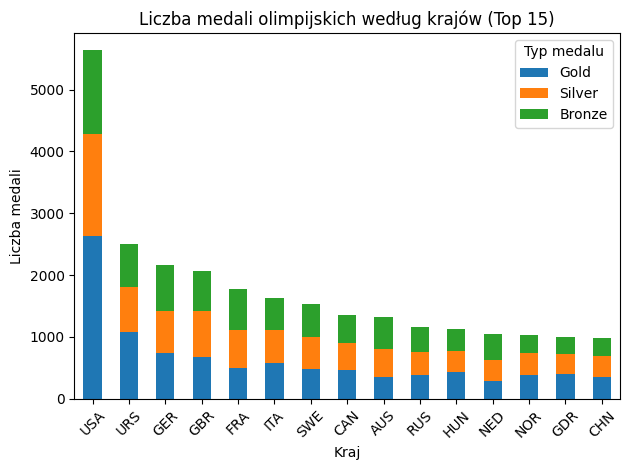


Statystyki dla wybranych krajów:
Medal  Bronze  Gold  Silver  Total
NOC                               
POL       253   117     195    565
GER       746   745     674   2165
USA      1358  2638    1641   5637
GBR       651   678     739   2068
FRA       666   501     610   1777

Procentowy udział poszczególnych medali dla wybranych krajów:

POL:
Złoto: 20.71%
Srebro: 34.51%
Brąz: 44.78%

GER:
Złoto: 34.41%
Srebro: 31.13%
Brąz: 34.46%

USA:
Złoto: 46.8%
Srebro: 29.11%
Brąz: 24.09%

GBR:
Złoto: 32.79%
Srebro: 35.74%
Brąz: 31.48%

FRA:
Złoto: 28.19%
Srebro: 34.33%
Brąz: 37.48%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sprawdźmy, czy plik istnieje
!ls -l athlete_events.csv

# Wczytanie danych
df = pd.read_csv('athlete_events.csv')

# Tworzenie DataFrame tylko z medalami (bez wartości NaN)
medals_df = df[df['Medal'].notna()]

# Grupowanie medali według krajów
medals_by_country = medals_df.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

# Dodanie kolumny z sumą wszystkich medali
medals_by_country['Total'] = medals_by_country.sum(axis=1)

# Sortowanie według łącznej liczby medali
medals_by_country_sorted = medals_by_country.sort_values('Total', ascending=False)

# Wyświetlenie top 15 krajów
print("\nTop 15 krajów pod względem liczby medali:")
print(medals_by_country_sorted.head(15))

# Wizualizacja dla top 15 krajów
plt.figure(figsize=(15, 8))
medals_by_country_sorted[['Gold', 'Silver', 'Bronze']].head(15).plot(kind='bar', stacked=True)
plt.title('Liczba medali olimpijskich według krajów (Top 15)')
plt.xlabel('Kraj')
plt.ylabel('Liczba medali')
plt.legend(title='Typ medalu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analiza dla wybranych krajów (możesz zmienić kody krajów według potrzeb)
selected_countries = ['POL', 'GER', 'USA', 'GBR', 'FRA']
medals_selected = medals_by_country_sorted.loc[selected_countries]
print("\nStatystyki dla wybranych krajów:")
print(medals_selected)

# Procentowy udział medali dla wybranych krajów
print("\nProcentowy udział poszczególnych medali dla wybranych krajów:")
for country in selected_countries:
    if country in medals_by_country_sorted.index:
        total = medals_by_country_sorted.loc[country, 'Total']
        gold_pct = (medals_by_country_sorted.loc[country, 'Gold'] / total * 100).round(2)
        silver_pct = (medals_by_country_sorted.loc[country, 'Silver'] / total * 100).round(2)
        bronze_pct = (medals_by_country_sorted.loc[country, 'Bronze'] / total * 100).round(2)
        print(f"\n{country}:")
        print(f"Złoto: {gold_pct}%")
        print(f"Srebro: {silver_pct}%")
        print(f"Brąz: {bronze_pct}%")

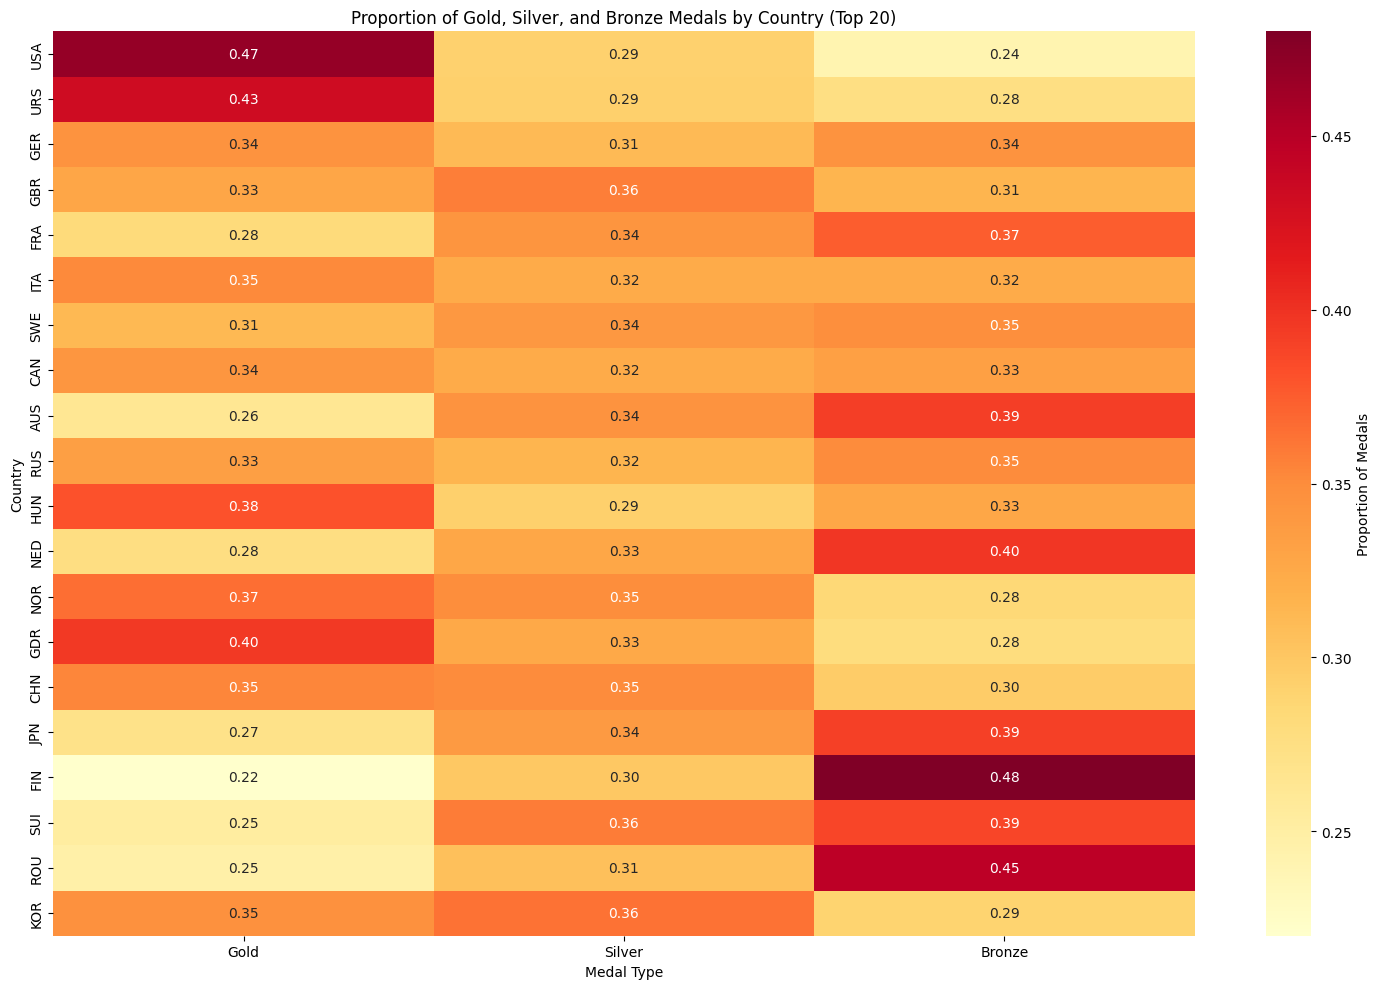

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure athlete_events.csv is accessible)
df = pd.read_csv('athlete_events.csv')

# Filter for rows where medals are not NaN
medals_df = df[df['Medal'].notna()]

# Group by country and medal type
medals_by_country = medals_df.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

# Add a column for total medals
medals_by_country['Total'] = medals_by_country.sum(axis=1)

# Sort by total medals
medals_by_country_sorted = medals_by_country.sort_values('Total', ascending=False)

# Normalize medal counts for heatmap (proportions)
medals_by_country_normalized = medals_by_country_sorted[['Gold', 'Silver', 'Bronze']].div(
    medals_by_country_sorted['Total'], axis=0
)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    medals_by_country_normalized.head(20),
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Proportion of Medals'},
)
plt.title("Proportion of Gold, Silver, and Bronze Medals by Country (Top 20)")
plt.ylabel("Country")
plt.xlabel("Medal Type")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from folium import plugins

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter for medals and group by NOC and medal type
medals_df = df[df['Medal'].notna()]
medals_by_country = medals_df.groupby(['NOC', 'Medal']).size().unstack(fill_value=0).reset_index()

# Add a 'Total' column for all medals
medals_by_country['Total'] = medals_by_country[['Gold', 'Silver', 'Bronze']].sum(axis=1)

# Load the world map GeoJSON
world_map = gpd.read_file('countries.geo.json')

# Merge medals data with the world map
merged_map = world_map.merge(medals_by_country, left_on='id', right_on='NOC', how='left')
for medal in ['Gold', 'Silver', 'Bronze', 'Total']:
    merged_map[medal] = merged_map[medal].fillna(0)

# Create a folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add choropleth layers for each medal type


# Add tooltips for interactivity
folium.GeoJson(
    merged_map,
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'Gold', 'Silver', 'Bronze', 'Total'],
        aliases=['Country', 'Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals'],
        localize=True
    ),
).add_to(m)

# Add a LayerControl to toggle between medal types
folium.LayerControl().add_to(m)

# Save and display the map
m.save('medals_map_with_selection.html')
m


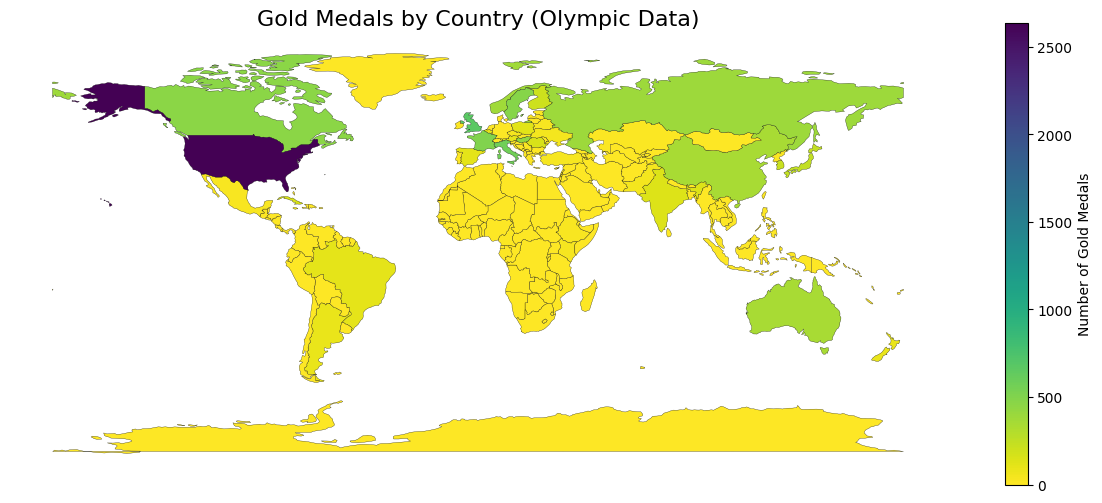

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter for gold medals and count by country
gold_medals = df[df['Medal'] == 'Gold']
gold_medals_by_country = gold_medals['NOC'].value_counts().reset_index()
gold_medals_by_country.columns = ['NOC', 'Gold_Medals']

# Load the world map GeoJSON
world_map = gpd.read_file('countries.geo.json')

# Merge gold medal data with the world map
merged_map = world_map.merge(gold_medals_by_country, left_on='id', right_on='NOC', how='left')
merged_map['Gold_Medals'] = merged_map['Gold_Medals'].fillna(0)  # Replace NaN with 0

# Visualize using GeoPandas with the 'viridis_r' colormap (reversed Viridis)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))  # Set the figure size
merged_map.plot(
    column='Gold_Medals',    # Column to color by
    cmap='viridis_r',        # Reversed Viridis colormap
    legend=True,             # Enable legend
    legend_kwds={
        'label': "Number of Gold Medals",  # Legend label
        'orientation': "vertical",         # Vertical legend
        'shrink': 0.6                      # Shrink legend size
    },
    edgecolor='black',       # Add a border to countries
    linewidth=0.2,           # Border thickness
    ax=ax                    # Plot on this axis
)

# Add title and clean up axis
ax.set_title("Gold Medals by Country (Olympic Data)", fontsize=16)
ax.set_axis_off()  # Turn off axes for a cleaner look
plt.tight_layout()

# Show the plot
plt.show()


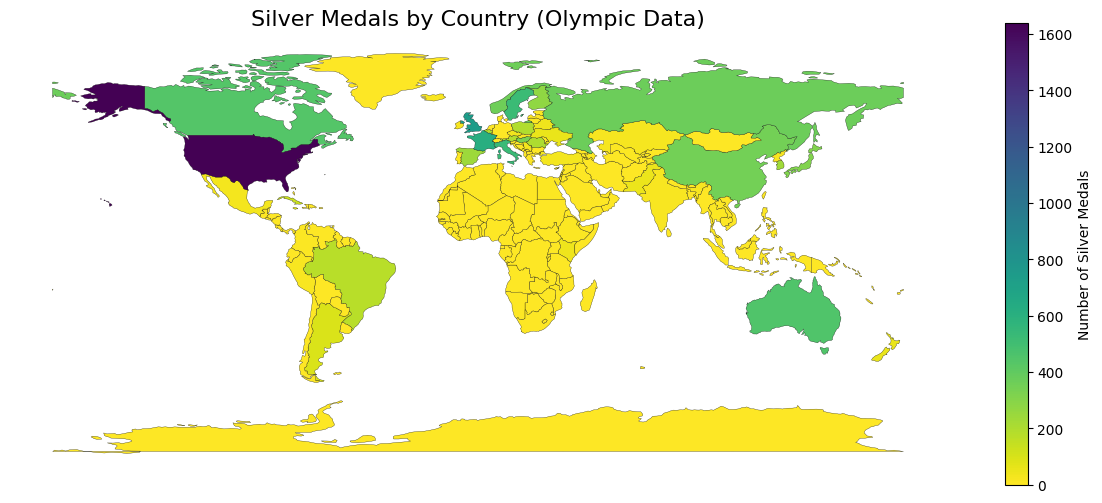

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter for silver medals and count by country
silver_medals = df[df['Medal'] == 'Silver']
silver_medals_by_country = silver_medals['NOC'].value_counts().reset_index()
silver_medals_by_country.columns = ['NOC', 'Silver_Medals']

# Load the world map GeoJSON
world_map = gpd.read_file('countries.geo.json')

# Merge silver medal data with the world map
merged_map = world_map.merge(silver_medals_by_country, left_on='id', right_on='NOC', how='left')
merged_map['Silver_Medals'] = merged_map['Silver_Medals'].fillna(0)  # Replace NaN with 0

# Visualize using GeoPandas with the 'viridis_r' colormap (reversed Viridis)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))  # Set the figure size
merged_map.plot(
    column='Silver_Medals',  # Column to color by
    cmap='viridis_r',        # Reversed Viridis colormap
    legend=True,             # Enable legend
    legend_kwds={
        'label': "Number of Silver Medals",  # Legend label
        'orientation': "vertical",          # Vertical legend
        'shrink': 0.6                       # Shrink legend size
    },
    edgecolor='black',       # Add a border to countries
    linewidth=0.2,           # Border thickness
    ax=ax                    # Plot on this axis
)

# Add title and clean up axis
ax.set_title("Silver Medals by Country (Olympic Data)", fontsize=16)
ax.set_axis_off()  # Turn off axes for a cleaner look
plt.tight_layout()

# Show the plot
plt.show()


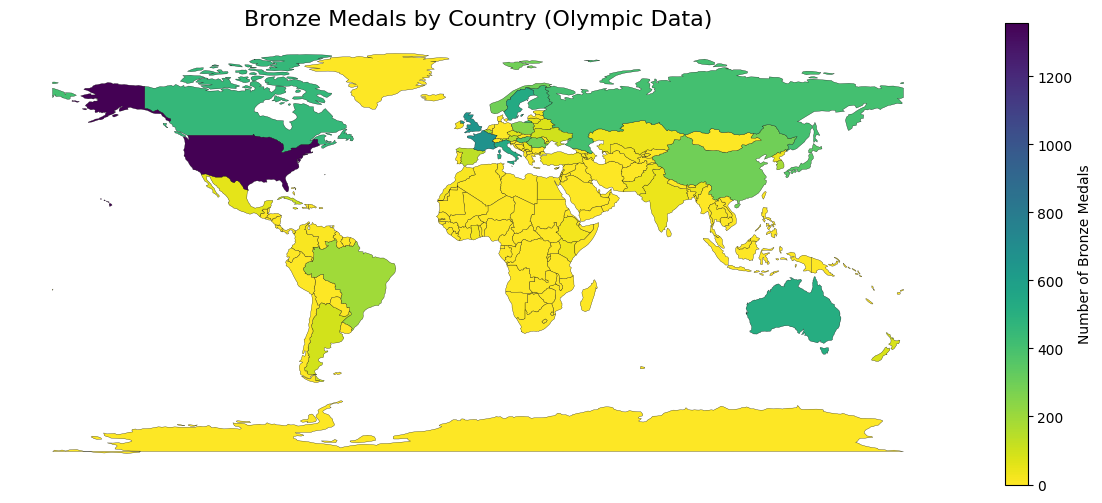

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter for bronze medals and count by country
bronze_medals = df[df['Medal'] == 'Bronze']
bronze_medals_by_country = bronze_medals['NOC'].value_counts().reset_index()
bronze_medals_by_country.columns = ['NOC', 'Bronze_Medals']

# Load the world map GeoJSON
world_map = gpd.read_file('countries.geo.json')

# Merge bronze medal data with the world map
merged_map = world_map.merge(bronze_medals_by_country, left_on='id', right_on='NOC', how='left')
merged_map['Bronze_Medals'] = merged_map['Bronze_Medals'].fillna(0)  # Replace NaN with 0

# Visualize using GeoPandas with the 'viridis_r' colormap (reversed Viridis)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))  # Set the figure size
merged_map.plot(
    column='Bronze_Medals',  # Column to color by
    cmap='viridis_r',        # Reversed Viridis colormap
    legend=True,             # Enable legend
    legend_kwds={
        'label': "Number of Bronze Medals",  # Legend label
        'orientation': "vertical",          # Vertical legend
        'shrink': 0.6                       # Shrink legend size
    },
    edgecolor='black',       # Add a border to countries
    linewidth=0.2,           # Border thickness
    ax=ax                    # Plot on this axis
)

# Add title and clean up axis
ax.set_title("Bronze Medals by Country (Olympic Data)", fontsize=16)
ax.set_axis_off()  # Turn off axes for a cleaner look
plt.tight_layout()

# Show the plot
plt.show()


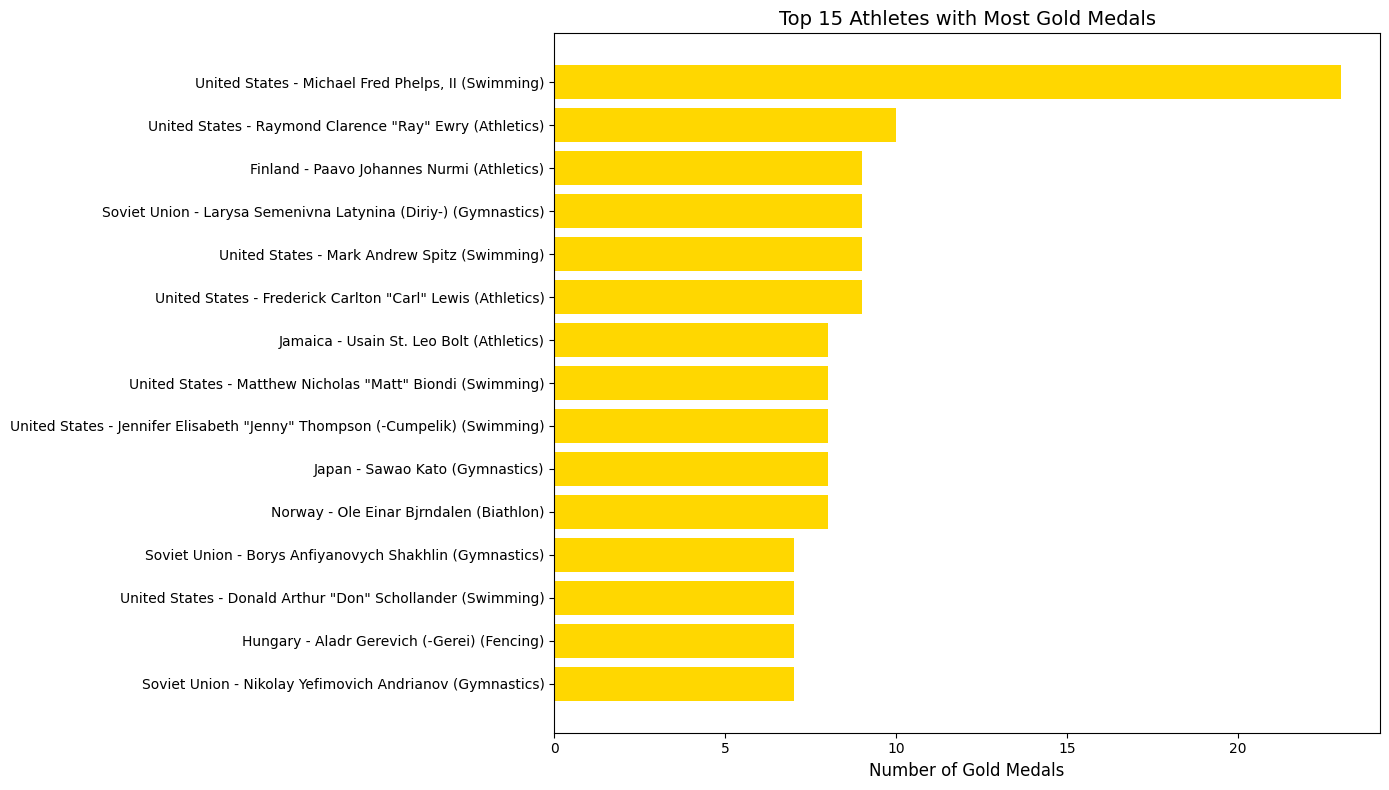

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter for gold medals
gold_medals = df[df['Medal'] == 'Gold']

# Count gold medals per athlete
gold_medals_count = gold_medals.groupby(['Name', 'Team', 'Sport']).size().reset_index(name='Gold_Medals')

# Sort by the number of gold medals and get the top 15 athletes
top_15_gold_medals = gold_medals_count.sort_values(by='Gold_Medals', ascending=False).head(15)

# Combine country, sport, and athlete's name for visualization
top_15_gold_medals['Name_with_Details'] = (
    top_15_gold_medals['Team'] + ' - ' + top_15_gold_medals['Name'] + ' (' + top_15_gold_medals['Sport'] + ')'
)

# Plot the data
plt.figure(figsize=(14, 8))
plt.barh(top_15_gold_medals['Name_with_Details'], top_15_gold_medals['Gold_Medals'], color='gold')
plt.xlabel('Number of Gold Medals', fontsize=12)
plt.title('Top 15 Athletes with Most Gold Medals', fontsize=14)
plt.gca().invert_yaxis()  # To have the highest medal count at the top
plt.tight_layout()

# Show the plot
plt.show()


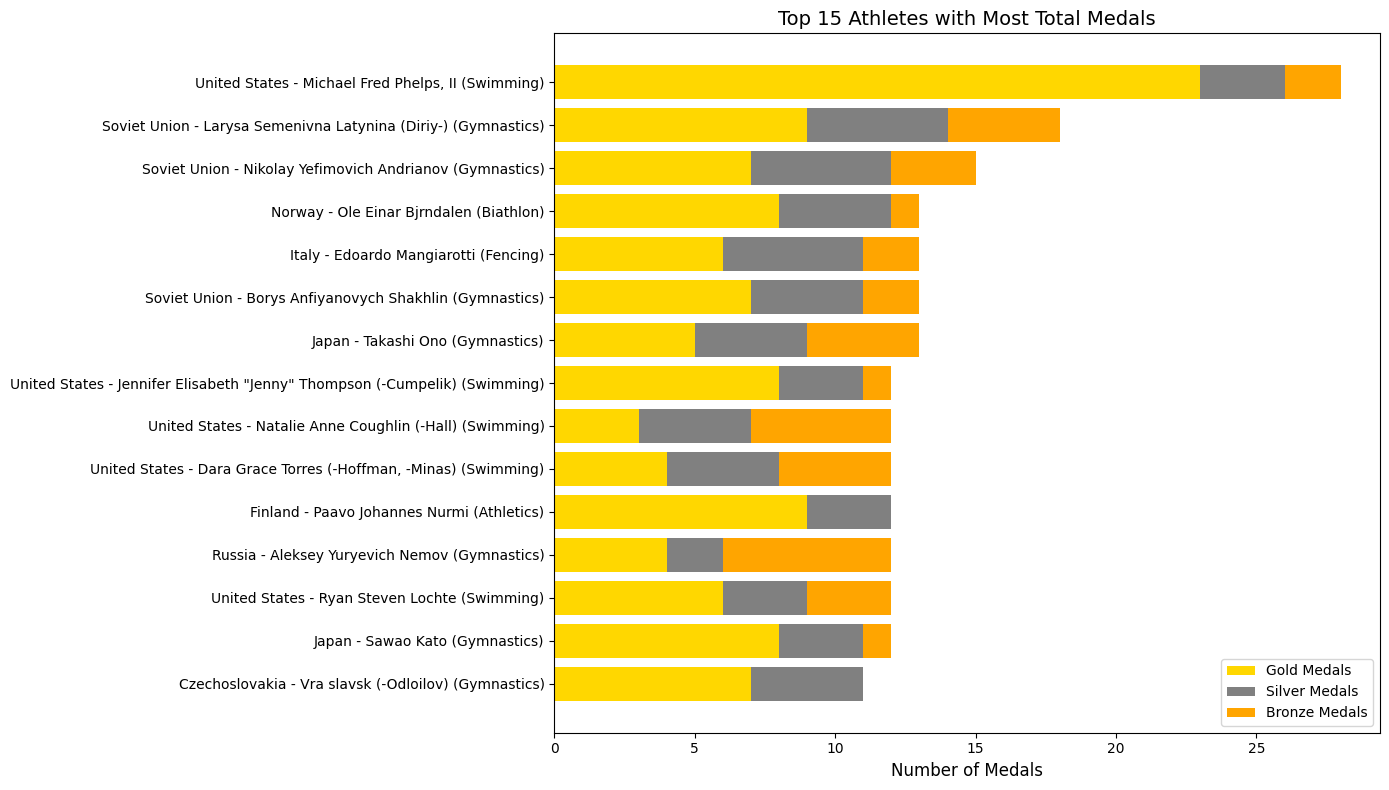

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter for rows with any medal
medals = df[df['Medal'].notna()]

# Count medals by type (gold, silver, bronze) per athlete
medals_count = medals.pivot_table(
    index=['Name', 'Team', 'Sport'],
    columns='Medal',
    aggfunc='size',
    fill_value=0
).reset_index()

# Add a total medals column
medals_count['Total_Medals'] = medals_count['Gold'] + medals_count['Silver'] + medals_count['Bronze']

# Sort by the total number of medals and get the top 15 athletes
top_15_medals = medals_count.sort_values(by='Total_Medals', ascending=False).head(15)

# Combine name, team, and sport for visualization
top_15_medals['Name_with_Details'] = (
    top_15_medals['Team'] + ' - ' + top_15_medals['Name'] + ' (' + top_15_medals['Sport'] + ')'
)

# Plot the data as a stacked bar chart
plt.figure(figsize=(14, 8))
plt.barh(
    top_15_medals['Name_with_Details'],
    top_15_medals['Gold'],
    color='gold',
    label='Gold Medals'
)
plt.barh(
    top_15_medals['Name_with_Details'],
    top_15_medals['Silver'],
    left=top_15_medals['Gold'],
    color='grey',
    label='Silver Medals'
)
plt.barh(
    top_15_medals['Name_with_Details'],
    top_15_medals['Bronze'],
    left=top_15_medals['Gold'] + top_15_medals['Silver'],
    color='orange',
    label='Bronze Medals'
)

# Add labels and title
plt.xlabel('Number of Medals', fontsize=12)
plt.title('Top 15 Athletes with Most Total Medals', fontsize=14)
plt.gca().invert_yaxis()  # To have the highest total medals at the top
plt.legend(loc='lower right', fontsize=10)  # Place legend at the bottom right corner
plt.tight_layout()

# Show the plot
plt.show()


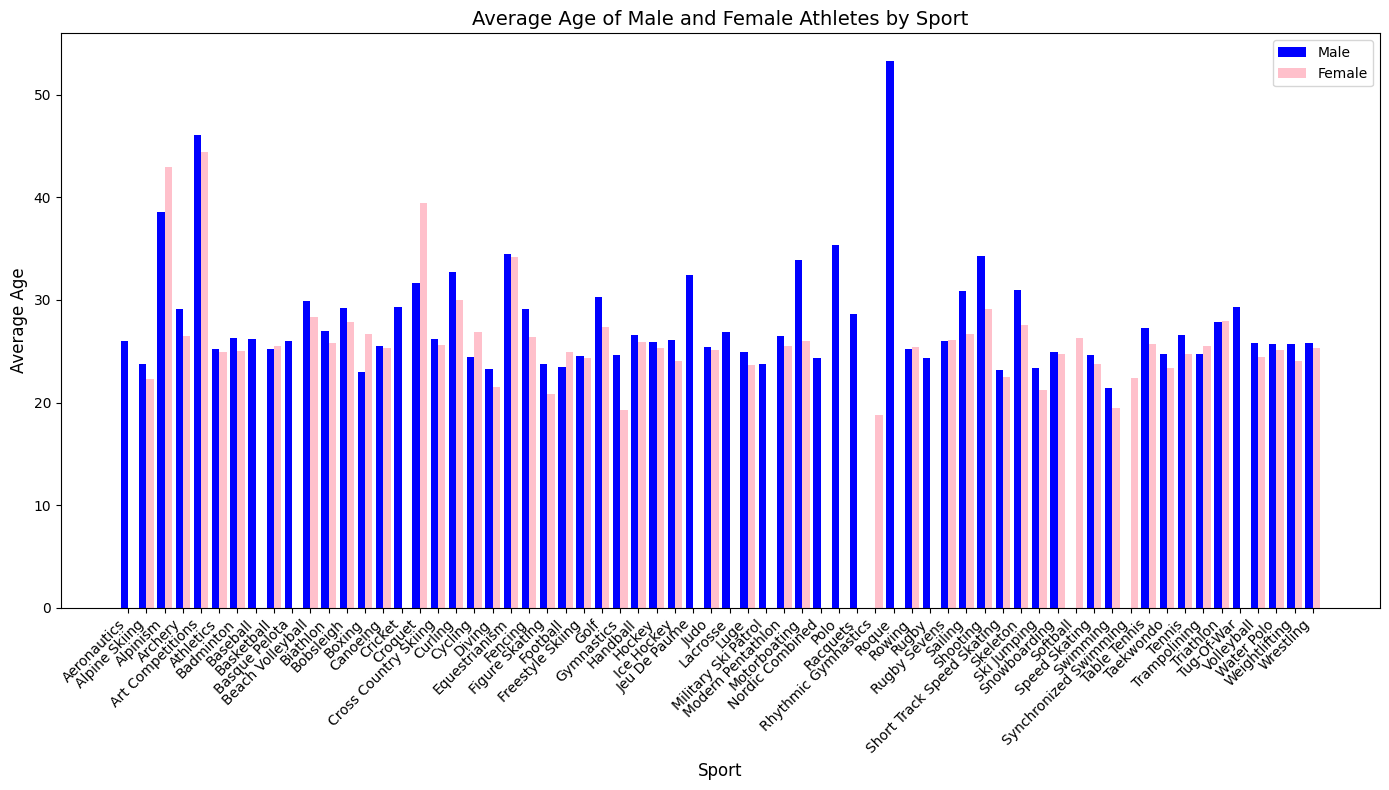

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter valid ages and group by Sport and Sex to calculate the average age
average_age = df[df['Age'].notna()].groupby(['Sport', 'Sex'])['Age'].mean().reset_index()

# Pivot the data to make it suitable for comparison
average_age_pivot = average_age.pivot(index='Sport', columns='Sex', values='Age').reset_index()

# Sort by sport for better readability
average_age_pivot = average_age_pivot.sort_values(by='Sport')

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(average_age_pivot))  # X-axis positions
bar_width = 0.4

# Plot bars for male and female average ages
ax.bar(x - bar_width / 2, average_age_pivot['M'], bar_width, label='Male', color='blue')
ax.bar(x + bar_width / 2, average_age_pivot['F'], bar_width, label='Female', color='pink')

# Add labels and title
ax.set_xlabel('Sport', fontsize=12)
ax.set_ylabel('Average Age', fontsize=12)
ax.set_title('Average Age of Male and Female Athletes by Sport', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(average_age_pivot['Sport'], rotation=45, ha='right')
ax.legend()

# Add tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


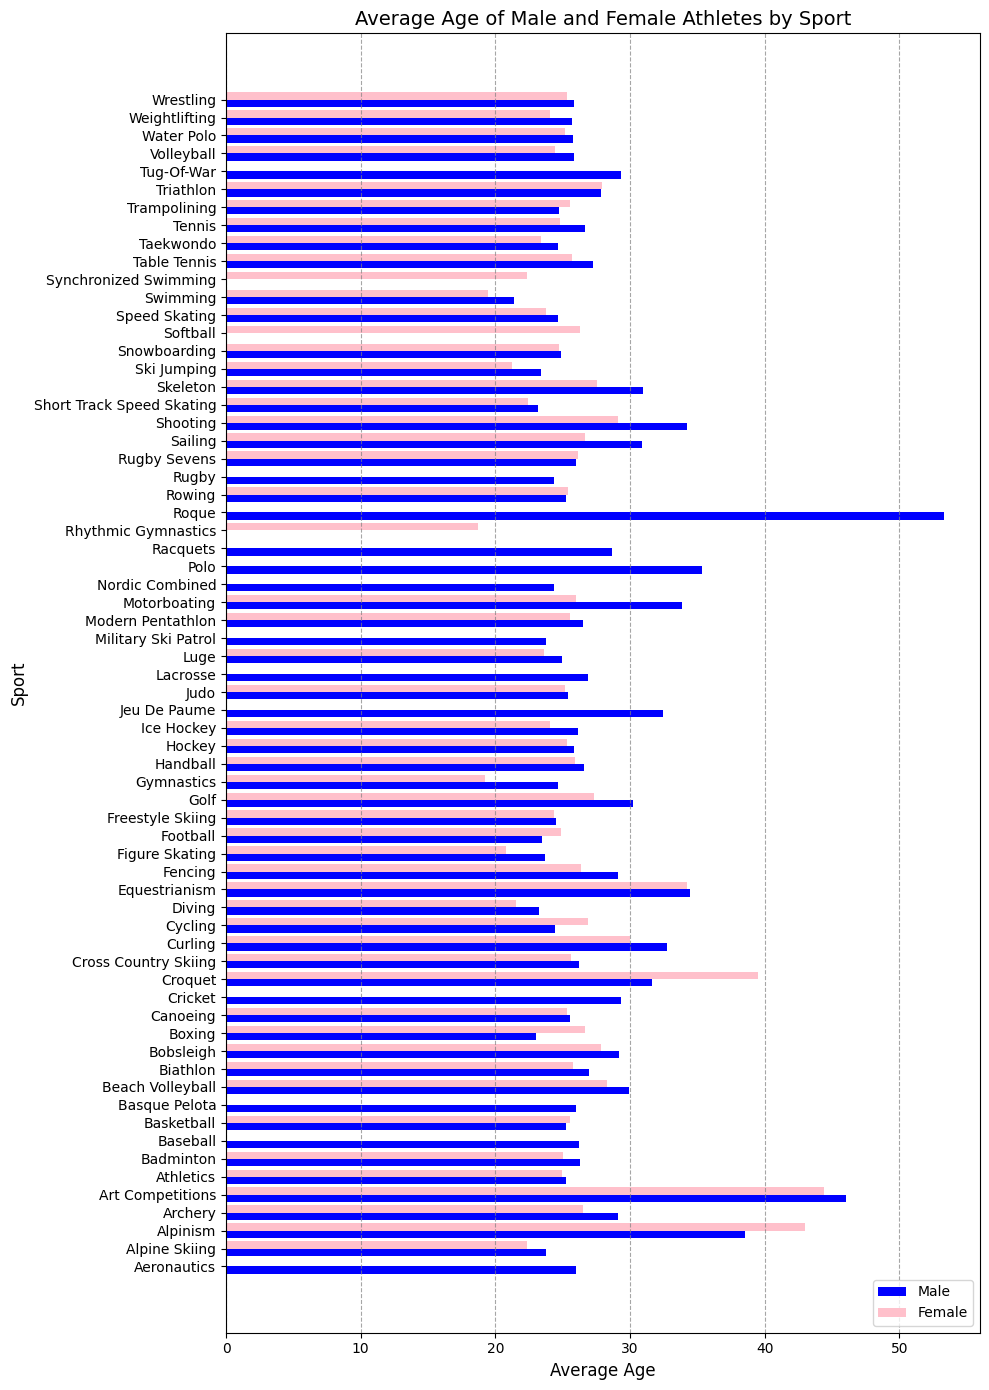

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the athlete data
df = pd.read_csv('athlete_events.csv')

# Filter valid ages and group by Sport and Sex to calculate the average age
average_age = df[df['Age'].notna()].groupby(['Sport', 'Sex'])['Age'].mean().reset_index()

# Pivot the data to make it suitable for comparison
average_age_pivot = average_age.pivot(index='Sport', columns='Sex', values='Age').reset_index()

# Sort by sport for better readability
average_age_pivot = average_age_pivot.sort_values(by='Sport')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 14))
y = np.arange(len(average_age_pivot))  # Y-axis positions
bar_height = 0.4

# Plot horizontal bars for male and female average ages
ax.barh(y - bar_height / 2, average_age_pivot['M'], bar_height, label='Male', color='blue')
ax.barh(y + bar_height / 2, average_age_pivot['F'], bar_height, label='Female', color='pink')

# Add labels and title
ax.set_ylabel('Sport', fontsize=12)
ax.set_xlabel('Average Age', fontsize=12)
ax.set_title('Average Age of Male and Female Athletes by Sport', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(average_age_pivot['Sport'])
ax.legend(loc='lower right')

# Add vertical grid lines every 10 years
ax.set_xticks(np.arange(0, 60, 10))  # Set ticks from 0 to 60 with a step of 10
ax.grid(axis='x', linestyle='--', color='grey', alpha=0.7)  # Add vertical grid lines

# Add tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
